# 1. Introduction

# 2. Python Libraries and Dataset

## Import Libraries

In [1]:
# Import necessary Python modules
import numpy as np                             # For handling mathematical functions in Python
import pandas as pd                            # For data processing
import matplotlib as mpl                       # For visualization of data as well as models
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Version of the modules used
print(f"Numpy ver. {np.__version__}")
print(f"Matplotlib ver. {mpl.__version__}")
print(f"Pandas ver. {pd.__version__}")

Numpy ver. 1.21.3
Matplotlib ver. 3.5.1
Pandas ver. 1.3.5


## Load Dataset

In [2]:
DATA_DIR = "..\Dataset"
DATA = "diamonds.csv"

def load_data(path=DATA_DIR, data=DATA):
    datapath = os.path.join(path, data)
    return pd.read_csv(datapath, index_col=0)

In [3]:
diamonds = load_data()

# 3. Explore Dataset

In [4]:
rows, col = diamonds.shape

print(f"Number of observations: {rows}")
print(f"Number of features: {col}")

Number of observations: 53940
Number of features: 10


In [5]:
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
# Modify indices to start at value 0
new_indices = np.arange(len(diamonds))

diamonds.set_index(new_indices, inplace=True)

In [8]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [18]:
# Rearrange columns
columns = ["carat", "depth", "table", "x", "y", "z", "price"]

diamonds = diamonds[columns]

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

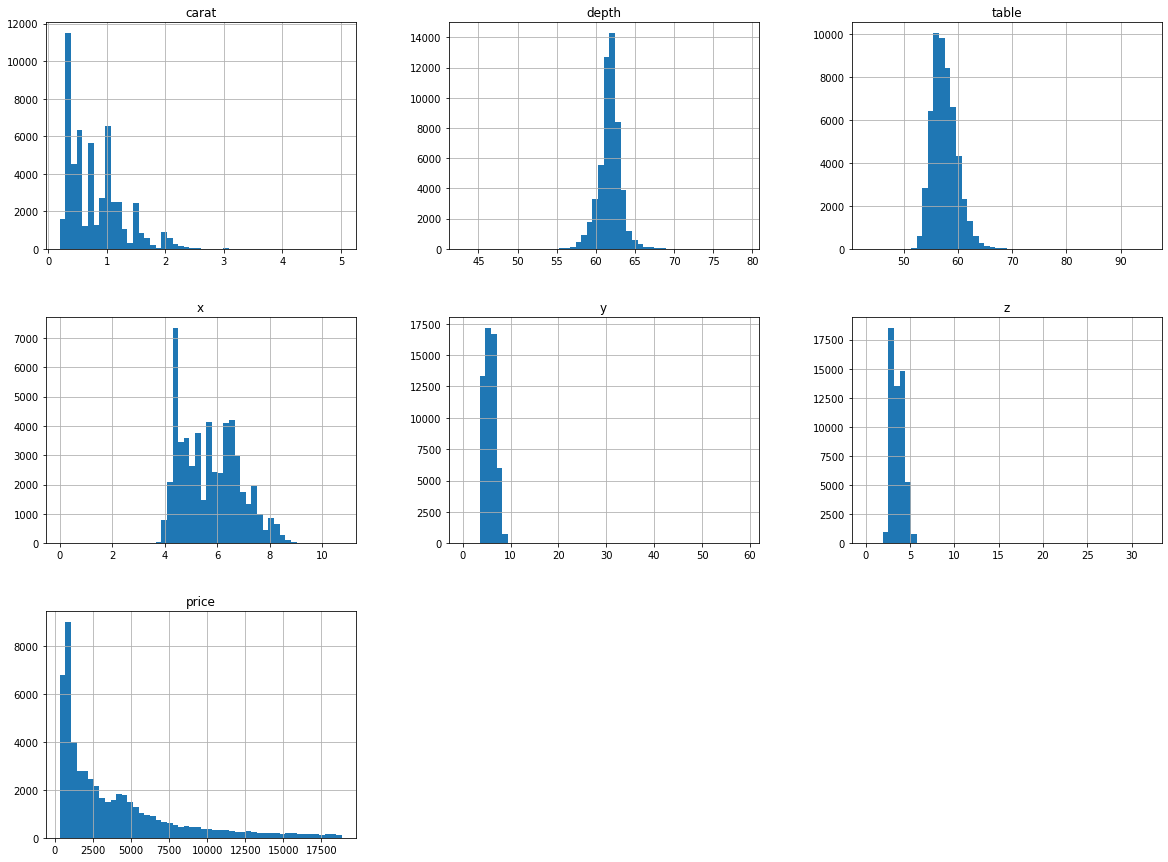

In [25]:
# Data distribution
diamonds.hist(bins=50, figsize=(20, 15))

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
# Split data into train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_indices, test_indices in split.split()